# Lab 06: OLS

In this lab, you will review the details of linear regression. In particular:

* `sns.lmplot` as a quick visual for Simple Linear Regression (SLR).
* `scikit-learn`, or `sklearn` for short, a real-world data science tool that is more robust and flexible than analytical or `scipy.optimize` solutions. 

You will also practice interpreting residual plots (vs. fitted values) and the Multiple $R^2$ metric used in Multiple Linear Regression.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Data Loading

For the first part of this lab, you will predict fuel efficiency (`mpg`) of several models of automobiles using a **single feature**: engine power (`horsepower`). For the second part, you will perform feature engineering on **multiple features** to better predict fuel efficiency.

First, let's load in the data.

In [3]:
# Here, we load the fuel dataset, and drop any rows that have missing data.
vehicle_data = sns.load_dataset('mpg').dropna()
vehicle_data = vehicle_data.sort_values('horsepower', ascending=True)
vehicle_data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel


In [5]:
vehicle_data.shape

(392, 9)

We have 392 datapoints and 8 potential features (plus our observed $y$ values, `mpg`).

Let's try to fit a line to the plot below, which shows `mpg` vs. `horsepower` for several models of automobiles.

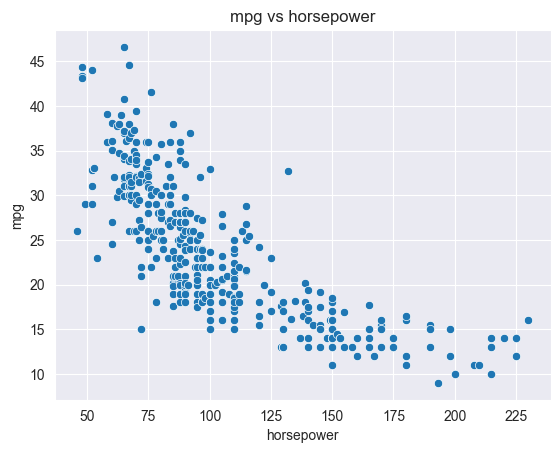

In [6]:
# Run this cell to visualize the data. 
sns.scatterplot(data=vehicle_data, x='horsepower', y='mpg');
plt.title("mpg vs horsepower");

<br/>
<hr style="border: 1px solid #fdb515;" />

## Question 1: Ordinary Least Squares
Recall that the equation for Simple Linear Regression (SLR) has two $\theta$ coefficients: $\theta_0$ and $\theta_1$, and is written as follows:

$$\hat{y} = \theta_0 + \theta_1 x$$


If we have many pairs of $(x_i, y_i)$ values, $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$, we would need to apply the SLR equation to each pair $n$ times. This is quite repetitive, so let's re-formulate our SLR equation using linear algebra. We'll:

* Rewrite our $\theta$ coefficients as a vector $\theta = [\theta_0, \theta_1]$.
* Stack our $x_i$ values into a vector $\vec{x}$ with $n$ values.
* Stack our $y_i$ values into a vector $\mathbb{Y}$ of all $n$ observations in our sample.

Then our prediction vector $\hat{\mathbb{Y}}$ can then be written as:
$$\Large \hat{\mathbb{Y}} = {\theta_0} \vec{1}_n + {\theta_1} \vec{x} = \begin{bmatrix} | & | \\ \vec{1}_n & \vec{x} \\ | & | \end{bmatrix} \begin{bmatrix} {\theta_0} \\ {\theta_1} \end{bmatrix} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} \begin{bmatrix} {\theta_0} \\ {\theta_1} \end{bmatrix} = \Bbb{X} \begin{bmatrix} {\theta_0} \\ {\theta_1} \end{bmatrix} = \mathbb{X} \theta$$

where $\mathbb{X} \in \mathbb{R}^{n\times2}$ is the **design matrix** with a **bias** column of all ones to account for the intercept, $\theta_0$, and one **feature** for all $n$ datapoints in our sample. 

Our equation now matches the Ordinary Least Squares (OLS) equation! 
$$\Large \hat{\mathbb{Y}} = \mathbb{X} \theta$$


### Expanding OLS to Multiple Linear Regression
The OLS equation can be expanded to cases when we have more than one feature, like in the case of our Multiple Linear Regression (MLR) model, where we can have $p$ features: 
$$\hat{y} = \theta_0 + \theta_1 x_1 + \dots + \theta_p x_p$$

Our OLS equation can be generalized as  
$$\Large \hat{\mathbb{Y}} = \begin{bmatrix} 
    1  & x_{1,1}  & x_{1,2}  & \cdots & x_{1,p}\\
    1  & x_{2,1}  & x_{2,2}    & \cdots & x_{2,p}\\
    \vdots & \vdots & \vdots & \ddots & \vdots\\
    1  & x_{n,1}  & x_{n,2}    & \cdots & x_{n,p}
\end{bmatrix}  
\begin{bmatrix} {\theta_0} \\ {\theta_1} \\ \vdots \\ \theta_{p} \end{bmatrix} = \mathbb{X} \theta
$$
with a
* **prediction vector** $\mathbb{Y} \in \mathbb{R}^{n}$,
* **design matrix** $\mathbb{X} \in \mathbb{R}^{n\times(p + 1)}$ representing the $p$ features for all $n$ datapoints in our sample,
* and a **parameter vector** $\theta \in \mathbb{R}^{p + 1}$.

Simple linear regression is a special case of OLS when $p=1$.

### Today's Lab

In today's lab, we'll explore the OLS equations with different examples.

* In Question 1, we'll explore how transforming data affects our prediction by using horsepower squared (`hp^2`) as our feature instead of `horsepower`. 
* In Question 2, we'll combine the features from questions 1 and 2 and use *multiple linear regression* on 2 features: `horsepower` and `hp^2`.


<!-- END QUESTION -->

<br/>
<hr style="border: 1px solid #fdb515;" />

## Question 1: Transform a Single Feature

The Tukey-Mosteller Bulge Diagram (shown below) tells us to transform our $\mathbb{X}$ or $\mathbb{Y}$ to find a linear fit.

<div style="text-align:center"><img src="tukey_mosteller.png" width="300vw" /></div>

Let's consider the following linear model:

$$\text{predicted mpg} = \theta_0 + \theta_1 \sqrt{\text{horsepower}}$$

<!-- BEGIN QUESTION -->

<br>

---
### Question 1a

In the cell below, explain why we use the term "linear" to describe the model above, even though it incorporates a square root of horsepower  as a feature.


_Type your answer here, replacing this text._

<!-- END QUESTION -->

### Introduction to `sklearn`

Another way to fit a linear regression model is to use `scikit-learn`, an industry-standard package for machine learning applications. Because it is application-specific, `sklearn` is often faster and more robust than the analytical or `scipy`-based computation methods we've used thus far. Note that `scikit-learn` and `sklearn` refers to the same package, but it can only be imported under the name `sklearn`. We will use these two names interchangeably in this class.

To use `sklearn`:

1. Create an `sklearn` object.
1. `fit` the object to data.
1. Analyze fit or call `predict`.

##### **1. Create object.** 

We first create a `LinearRegression` object. Here's the `sklearn` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Note that by default, the object will include an intercept term when fitting.

Here, `model` is like a "blank slate" for a linear model.

In [8]:
# 1. Run this cell to initialize a sklearn LinearRegression object.
from sklearn.linear_model import LinearRegression

# the `fit_intercept` argument controls whether or not the model should have an intercept (or bias) term
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

##### **2. `fit` the object to data.** 

Now, we need to tell `model` to "fit" itself to the data. Essentially, this is doing exactly what you did in the previous part of this lab (creating a risk function and finding the parameters that minimize that risk).

**Note**: `X` needs to be a matrix (or `DataFrame`), as opposed to a single array (or `Series`) when running `model.fit`. This is because `sklearn.linear_model` is robust enough to be used for multiple regression, which we will look at later in this lab. This is why we use the double square brackets around `sqrt(hp)` when passing in the argument for `X`.

In [9]:
# 2. Run this cell to add sqrt(hp) column for each car in the dataset.
vehicle_data['sqrt(hp)'] = np.sqrt(vehicle_data['horsepower'])
vehicle_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,sqrt(hp)
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,6.782330
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle,6.782330
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),6.928203
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),6.928203
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,6.928203


In [46]:
# 2. Run this cell to fit the model to the data.
model.fit(X = vehicle_data[['sqrt(hp)']], y = vehicle_data['mpg'])

LinearRegression()

##### **3. Analyze fit.** 

Now that the model exists, we can look at the $\hat{\theta}_0$ and $\hat{\theta}_1$ values it found, which are given in the attributes `intercept` and `coef`, respectively.

In [11]:
model.intercept_

np.float64(58.705172037217466)

In [12]:
model.coef_

array([-3.50352375])

To use the `sklearn` linear regression model to make predictions, you can use the `model.predict` method.

Below, we find the estimated `mpg` for a single datapoint with a `sqrt(hp)` of 6.78 (i.e., horsepower 46). Unlike the linear algebra approach, we do not need to manually add an intercept term because our `model` (which was created with `fit_intercept=True`) will automatically add one.

**Note:** You may receive a user warning about missing feature names. This is due to the fact that we fitted on the feature DataFrame `vehicle_data[['sqrt(hp)']]` with feature names `"sqrt(hp)"` but only pass in a simple 2D arrays for prediction. To avoid this, we can convert our 2D array into a DataFrame with the matching feature name.

In [13]:
# Needs to be a 2D array since the X in step 2 was 2-dimensional.
single_datapoint = [[6.78]]
# Uncomment the following to see the result of predicting on a DataFrame instead of 2D array.
#single_datapoint = pd.DataFrame([[6.78]], columns = ['sqrt(hp)']) # 
model.predict(single_datapoint) 

C:\Users\quiri\OneDrive - FEI\Trabalhos\Facul\9° semestre\Tratamento de Dados\Tratamento de Dados\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34.95128104])

<!-- BEGIN QUESTION -->

<br>

---

### Question 1b

Using the model defined above, which takes in `sqrt(hp)` as an input explanatory variable, predict the `mpg` for the full `vehicle_data` dataset. Assign the predictions to `predicted_mpg_hp_sqrt`. Running the cell will then compute the multiple $R^2$ value and create a linear regression plot for this new square root feature, overlaid on the original least squares estimate (used in Question 1c).

Multiple R^2 using sqrt(hp):  0.6437035832706465


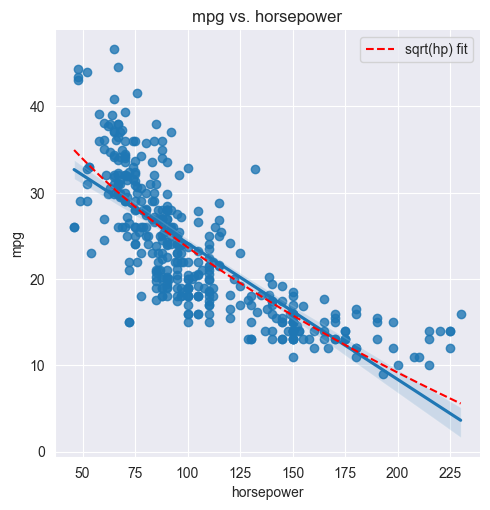

In [14]:
predicted_mpg_hp_sqrt = model.predict(vehicle_data[['sqrt(hp)']])

# Do not modify below this line.
r2_hp_sqrt = np.var(predicted_mpg_hp_sqrt) / np.var(vehicle_data['mpg'])
print('Multiple R^2 using sqrt(hp): ', r2_hp_sqrt)

sns.lmplot(x = 'horsepower', y = 'mpg', data = vehicle_data)
plt.plot(vehicle_data['horsepower'],  predicted_mpg_hp_sqrt,
         color = 'r', linestyle='--', label='sqrt(hp) fit');
plt.title("mpg vs. horsepower")
plt.legend();

<!-- END QUESTION -->

The visualization shows a slight improvement, but the points on the scatter plot are still more "curved" than our prediction line. Let's try a quadratic feature instead! 

Next, we use the power of OLS to **add an additional feature.** Questions 1 and 2 utilized simple linear regression, a special case of OLS where we have 1 feature ($p=1$). For the following questions, we'll utilize multiple linear regression, which are cases of OLS when we have more than 1 features ($p > 1$). 

<br/>
<hr style="border: 1px solid #fdb515;" />

## Add an Additional Feature

For the second part of this lab, we move from SLR to multiple linear regression.

Until now, we have established relationships between one independent explanatory variable and one response variable. However, with real-world problems, you will often want to use **multiple features** to model and predict a response variable. Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to the observed data.

We can consider including functions of existing features as **new features** to help improve the predictive power of our model. (This is something we will discuss in further detail in the Feature Engineering lecture.)

The cell below adds a column that contains the square of the horsepower for each car in the dataset.

In [15]:
# Run this cell to add a column of horsepower squared, no further action needed.
vehicle_data['hp^2'] = vehicle_data['horsepower'] ** 2
vehicle_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,sqrt(hp),hp^2
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,6.782330,2116.0
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle,6.782330,2116.0
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),6.928203,2304.0
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),6.928203,2304.0
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,6.928203,2304.0


<br>

---
## Question 2

### Question 2a

Using `sklearn`'s `LinearRegression`, create and fit a model that tries to predict `mpg` from `horsepower` AND `hp^2` using the DataFrame `vehicle_data`. Name your model `model_multi`.

**Hint**: It should follow a similar format as Question 2.

**Note**: You must create a new model again using `LinearRegression()`, otherwise the old model from Question 2 will be overwritten. If you do overwrite it, don't fret! Just restart your kernel and run your cells in order. If you are unsure why this overwritting happens, please review [object-oriented programming](https://cs61a.org/study-guide/objects/) from CS61A.

In [32]:
model_multi = LinearRegression() # By default, fit_intercept=True

model_multi.fit(X = vehicle_data[['horsepower', 'hp^2']], y = vehicle_data['mpg'])

LinearRegression()

After fitting, we can see the coefficients and intercept. Note that there are now two elements in `model_multi.coef_`, since there are two features.

In [33]:
model_multi.intercept_

np.float64(56.90009970211301)

In [34]:
model_multi.coef_

array([-0.46618963,  0.00123054])


<br>

---

### Question 2b

Using the above values, write out the function that the model is using to predict `mpg` from `horsepower` and `hp^2`.


_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br/>

The plot below shows the prediction of our model. It's much better!

Multiple R^2 using both horsepower and horsepower squared:  0.6875590305127546


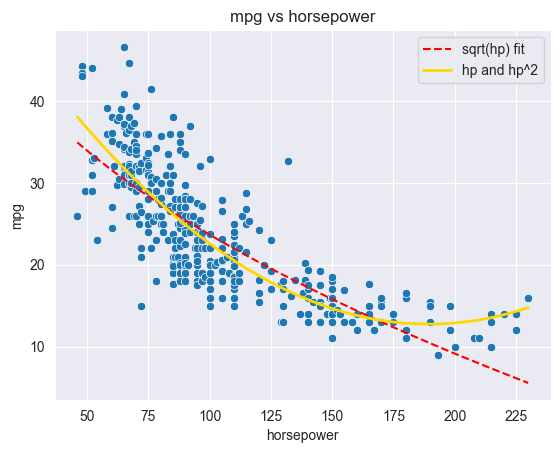

In [35]:
# Run this cell to show the prediction of our model.
predicted_mpg_multi = model_multi.predict(vehicle_data[['horsepower', 'hp^2']])
r2_multi = np.var(predicted_mpg_multi) / np.var(vehicle_data['mpg'])
print('Multiple R^2 using both horsepower and horsepower squared: ', r2_multi)

sns.scatterplot(x = 'horsepower', y = 'mpg', data = vehicle_data)
# plt.plot(vehicle_data['horsepower'],  predicted_mpg_hp_only, label='hp only');
plt.plot(vehicle_data['horsepower'],  predicted_mpg_hp_sqrt, color = 'r', linestyle='--', label='sqrt(hp) fit');
plt.plot(vehicle_data['horsepower'],  predicted_mpg_multi, color = 'gold', linewidth=2, label='hp and hp^2');
plt.title("mpg vs horsepower")
plt.legend();

By incorporating a squared feature, we are able to capture the curvature of the dataset. Our model is now a parabola centered on our data. 

<br>

---

### Question 2c

In the cell below, we assign the mean of the `mpg` column of the `vehicle_data` DataFrame to `mean_mpg`. Given this information, what is the mean of the `mean_predicted_mpg_hp_only`, `predicted_mpg_hp_sqrt`, and `predicted_mpg_multi` arrays?

**Hint**: Your answer should be a function of `mean_mpg` provided, you should not have to call `np.mean` in your code.


In [47]:
mean_mpg = np.mean(vehicle_data['mpg'])
mean_predicted_mpg_hp_sqrt = np.mean(model.predict(vehicle_data[['sqrt(hp)']]))
mean_predicted_mpg_multi = np.mean(model_multi.predict(vehicle_data[['horsepower', 'hp^2']]))

print('Mean mpg: ', mean_mpg)
print('mean_predicted_mpg_hp_sqrt: ', mean_predicted_mpg_hp_sqrt)
print('mean_predicted_mpg_multi: ', mean_predicted_mpg_multi)

Mean mpg:  23.445918367346938
mean_predicted_mpg_hp_sqrt:  23.445918367346938
mean_predicted_mpg_multi:  23.445918367346938


Comparing this model with previous models:

In [48]:
# Compares q1, q2, q3, and overfit models (ignores redundant model)
# print('Multiple R^2 using only horsepower: ', r2_hp_only)
print('Multiple R^2 using sqrt(hp): ', r2_hp_sqrt)
print('Multiple R^2 using both hp and hp^2: ', r2_multi)

Multiple R^2 using sqrt(hp):  0.6437035832706465
Multiple R^2 using both hp and hp^2:  0.6875590305127546


Observe that the R^2 value of the last model is the highest. In fact, it can be proven that multiple R^2 will not decrease as we add more variables. You may be wondering, what will happen if we add more variables? We will discuss the limitations of adding too many variables in an upcoming lecture. Below, we consider an extreme case that we include a variable twice in the model.

You might also be wondering why we chose to use `hp^2` as our additional feature, even though that transformation in the Tukey-Mosteller Bulge Diagram doesn't correspond to the bulge in our data. The Bulge diagram is a good starting point for transforming our data, but you may need to play around with different transformations to see which of them is able to capture the true relationship in our data and create a model with the best fit. This trial and error process is a very useful technique used all throughout data science!